<a href="https://colab.research.google.com/github/rameshkumark24/Stockmarketfutureprediction/blob/main/StockMarketprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
start = '2015-01-01'
end = '2025-01-01'
stock = 'ZOMATO.NS'

data = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.reset_index(inplace= True)
data

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS
0,2021-07-23,126.000000,126.000000,138.899994,115.000000,116.000000,694895290
1,2021-07-26,140.649994,140.649994,143.750000,125.300003,126.349998,249723854
2,2021-07-27,132.899994,132.899994,147.800003,127.750000,141.699997,240341900
3,2021-07-28,131.199997,131.199997,135.000000,123.550003,131.000000,159793731
4,2021-07-29,141.550003,141.550003,144.000000,132.199997,134.949997,117973089
...,...,...,...,...,...,...,...
845,2024-12-24,274.850006,274.850006,277.000000,269.100006,274.500000,37011994
846,2024-12-26,273.200012,273.200012,276.799988,271.250000,276.600006,26031760
847,2024-12-27,271.250000,271.250000,275.899994,269.750000,274.899994,18997843


In [ ]:
ma_100_days = data.Close.rolling(100).mean()

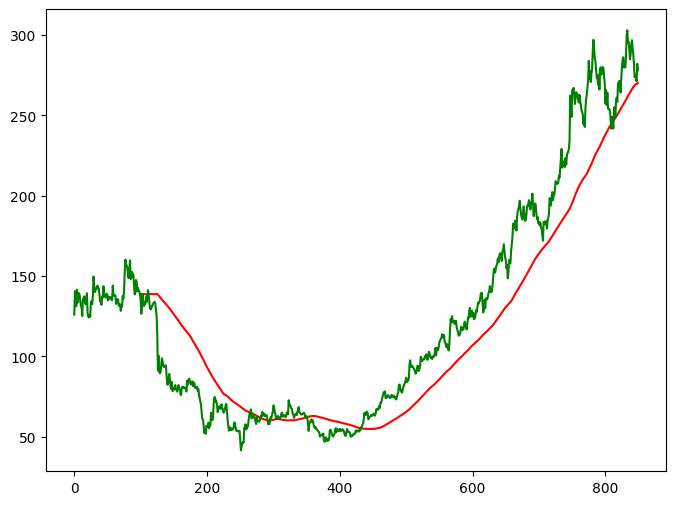

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [ ]:
ma_200_days = data.Close.rolling(200).mean()

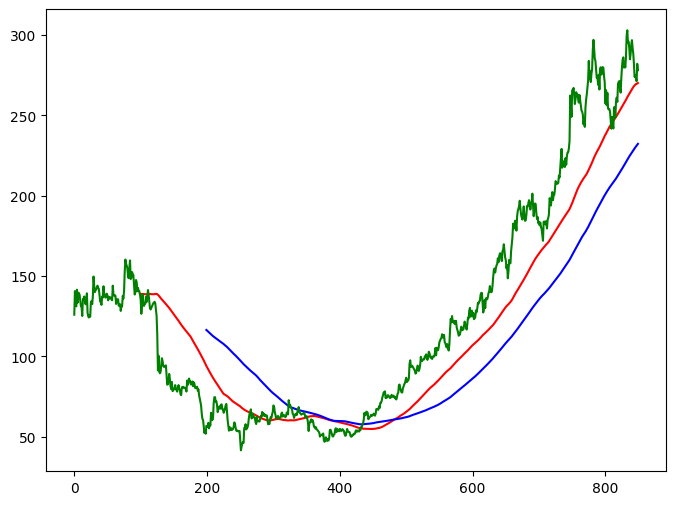

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [ ]:
data.dropna(inplace=True)

In [ ]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.79)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.79):len(data)])

In [ ]:
data_train.shape[0],data_test.shape[0]

(671, 179)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_train_scale = scaler.fit_transform(data_train)

In [ ]:
x=[]
y=[]
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [ ]:
x,y = np.array(x),np.array(y)

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units =50, activation='relu', return_sequences= True,input_shape = (x.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units =60, activation='relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units =80, activation='relu', return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units =120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [ ]:
model.compile(optimizer = "adam",loss = "mean_squared_error")
model.fit(x,y,epochs=50,batch_size=32, verbose=1)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 367ms/step - loss: 0.0889
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 254ms/step - loss: 0.0128
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 317ms/step - loss: 0.0097
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 257ms/step - loss: 0.0084
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 367ms/step - loss: 0.0099
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 283ms/step - loss: 0.0078
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 353ms/step - loss: 0.0085
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 279ms/step - loss: 0.0093
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 326ms/step - loss: 0.0093
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 338ms/step - loss: 0.0066
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 254ms/step - loss: 0.0071
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 362ms/step - loss: 0.0052
Epoch 13/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 253ms/step - loss: 0.0052
Epoch 14/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 283ms/step - loss: 0.0095
Epoch 15/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 253ms/step -

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [ ]:
pass_100_days = data_train.tail(100)

In [ ]:
data_test = pd.concat([pass_100_days,data_test],ignore_index=True)

In [ ]:
data_test_scale = scaler.fit_transform(data_test)

In [ ]:
x=[]
y=[]
for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [ ]:
y_predict = model.predict(x)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


In [ ]:
scale = 1/scaler.scale_

In [ ]:
y_predict = y_predict* scale
y = y* scale

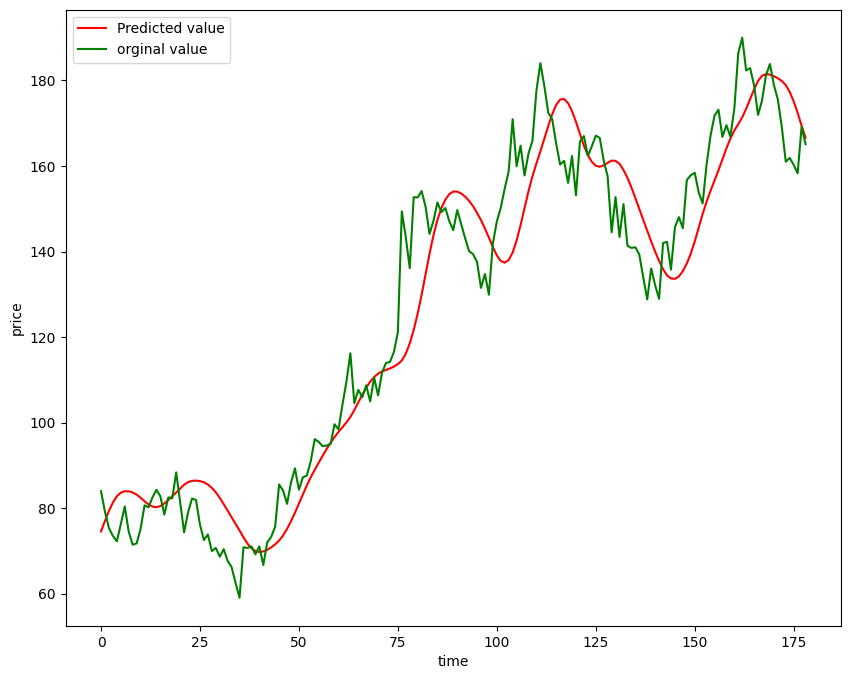

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r', label = 'Predicted value')
plt.plot(y,'g', label = 'orginal value')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

In [ ]:
model.save('stock prediction model.keras')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
         Date  Predicted Price
0  2025-01-01       277.240814
1  2025-01-02       275.480255
2  2025-01-03       274.264587
3  2025-01-04       273.485229
4  2025-01-05       273.013123
5  2025-01-06       272.733826
6  2025-01-07       272.562653
7  2025-01-08       272.445770
8  2025-01-09       272.354095
9  2025-01-10       272.275208


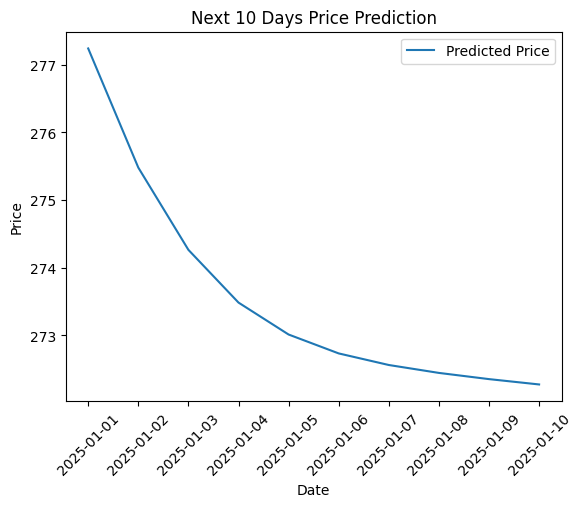

In [ ]:
# prompt: create an prediction for next 10 days from the end date

# Load the saved model
from keras.models import load_model
model = load_model('stock prediction model.keras')

# Get the last 100 days of data
last_100_days = data['Close'][-100:].values.reshape(-1, 1)

# Scale the data
last_100_days_scaled = scaler.transform(last_100_days)

# Reshape for the LSTM model
current_data = last_100_days_scaled.reshape(1, 100, 1)

# Predict the next 10 days
next_10_days_prediction = []
for _ in range(10):
    prediction = model.predict(current_data)
    next_10_days_prediction.append(prediction[0, 0])
    current_data = np.concatenate((current_data[:, 1:, :], prediction.reshape(1, 1, 1)), axis=1)

# Inverse transform the prediction to original scale
next_10_days_prediction = np.array(next_10_days_prediction).reshape(-1, 1)
next_10_days_prediction = scaler.inverse_transform(next_10_days_prediction)

# Create a date range for the predictions
from datetime import date, timedelta
start_date = date(2025, 1, 1)  # Replace with your 'end' date
prediction_dates = [start_date + timedelta(days=i) for i in range(10)]

# Create a DataFrame for the predictions
predictions_df = pd.DataFrame({'Date': prediction_dates, 'Predicted Price': next_10_days_prediction.flatten()})

# Print or plot the predictions
print(predictions_df)

import matplotlib.pyplot as plt
plt.plot(predictions_df['Date'], predictions_df['Predicted Price'], label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Next 10 Days Price Prediction')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

TESTING

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ... (Your existing code) ...

# 1. Prepare Testing Data
# Access the 'ZOMATO.NS' column (which represents 'Close')
test_data_scaled = scaler.transform(data_test[['ZOMATO.NS']])  # Access 'ZOMATO.NS'

# Create lagged features
x_test = []
y_test = []
for i in range(100, test_data_scaled.shape[0]):
    x_test.append(test_data_scaled[i-100:i])
    y_test.append(test_data_scaled[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)

# 2. Make Predictions
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)

# 2. Evaluate the Model
# Access the 'ZOMATO.NS' column for evaluation
mse = mean_squared_error(data_test['ZOMATO.NS'][100:], y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(data_test['ZOMATO.NS'][100:], y_pred)
r2 = r2_score(data_test['ZOMATO.NS'][100:], y_pred)

# 3. Print Metrics
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
MSE: 120.29038170706637
RMSE: 10.967697192531638
MAE: 8.614082890515887
R-squared: 0.9181477991160475
